In [ ]:
!pip install ipython-autotime

In [1]:
%load_ext autotime

time: 471 µs (started: 2021-03-20 21:48:53 +01:00)


In [2]:
import torch         
import torchvision
import torchvision.transforms as transforms

time: 495 ms (started: 2021-03-20 21:48:54 +01:00)


In [3]:
trainset = torchvision.datasets.CIFAR10(train = True, target_transform = transforms.ToTensor(),root="cifar-10", download = True)

Files already downloaded and verified
time: 689 ms (started: 2021-03-20 21:48:55 +01:00)


In [4]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar-10
    Split: Train
    StandardTransform
Target transform: ToTensor()

time: 9.96 ms (started: 2021-03-20 21:48:56 +01:00)


In [5]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

time: 740 µs (started: 2021-03-20 21:48:57 +01:00)


In [6]:
testset = torchvision.datasets.CIFAR10(train = False, target_transform = transforms.ToTensor(),root="cifar-10-test", download = True)

Files already downloaded and verified
time: 558 ms (started: 2021-03-20 21:48:57 +01:00)


In [7]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifar-10-test
    Split: Test
    StandardTransform
Target transform: ToTensor()

time: 3.05 ms (started: 2021-03-20 21:48:58 +01:00)


In [8]:
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

time: 731 µs (started: 2021-03-20 21:48:58 +01:00)


In [9]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

time: 604 µs (started: 2021-03-20 21:48:59 +01:00)


In [10]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
time: 1.18 s (started: 2021-03-20 21:48:59 +01:00)


Preview CIFAR-10 dataset images

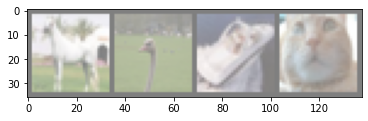

horse  bird  ship   cat
time: 288 ms (started: 2021-03-20 21:49:02 +01:00)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Check if GPU is present - if yes computer on GPU else on CPU

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

time: 74.8 ms (started: 2021-03-20 21:49:04 +01:00)


###### Setting up the layers of Convolutional neural network

In [13]:
import torch.nn as nn

time: 798 µs (started: 2021-03-20 21:49:05 +01:00)


In [14]:
in_size = 3                 # number of channel in the input image
 
hid1_size = 64              # no of output channel from first CNN layer

hid2_size = 128              # no of output channel from second CNN layer

hid3_size = 256

hid4_size = 512

out_size = len(labels)      # no of categories in the dataset
#set_trace()
k_conv_size = 3             # 3x3 convolutional kernel
conv_stride = 1
conv_pad = 1

time: 1.15 ms (started: 2021-03-20 21:49:06 +01:00)


In [15]:
class VGG_11(nn.Module):
    
    def __init__(self):
        super(VGG_11,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, k_conv_size, stride=conv_stride, padding=conv_pad),    # conv layer
            nn.ReLU(),                              # Activation layer
            nn.MaxPool2d(kernel_size=2,stride=2))  # Pooling layer with kernel size 2x2
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,128,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(128,256,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(256,256,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(256,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU())
        
        self.layer6 = nn.Sequential(
            nn.Conv2d(512,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))

        self.layer7 = nn.Sequential(
            nn.Conv2d(512,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU())

        self.layer8 = nn.Sequential(
            nn.Conv2d(512,512,k_conv_size, stride=conv_stride, padding=conv_pad),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))      
        
        
        self.fullyConnected1= nn.Linear(512, 512)      # Fully connected layer
        
        self.fullyConnected2= nn.Linear(512, 512)         # Fully connected layer
        
        self.fullyConnected3= nn.Linear(512, 10)           # Fully connected layer
            
        
    def forward(self,x):
            out = self.layer1(x)
            #print(out.shape)
            
            out = self.layer2(out)
            #print(out.shape)
            
            out = self.layer3(out)
            
            out = self.layer4(out)
            
            out = self.layer5(out)
            
            out = self.layer6(out)
            
            out = self.layer7(out)
            
            out = self.layer8(out)
            #print('Shape of Layer 8',out.shape)
            
            
            #print('out.size(0) ', out.size(0))
            out = out.reshape(out.size(0), -1) #######
            #print('Shape after reshape',out.shape)
            
            m = nn.Dropout(p=0.5)
            out = m(nn.functional.relu(self.fullyConnected1(out)))
            
            out = m(nn.functional.relu(self.fullyConnected2(out)))
            
            out = m(nn.functional.relu(self.fullyConnected3(out)))
            
            #print(out.shape)
            
            return out 
        
vgg_11 = VGG_11()

time: 59 ms (started: 2021-03-20 21:49:07 +01:00)


## Define a Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

in_size = 3                 # number of channel in the input image
 
hid1_size = 64              # no of output channel from first CNN layer

hid2_size = 128              # no of output channel from second CNN layer

out_size = len(labels)      # no of categories in the dataset

k_conv_size = 3             # 3x3 convolutional kernel

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Define a Loss function and optimizer

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_11.parameters(), lr=0.001, momentum=0.9)

time: 1.54 ms (started: 2021-03-20 21:49:11 +01:00)


## Train the network

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #print('i ',i)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg_11(inputs)
        #print('CP 1')
        #print('Model ', outputs)
        loss = criterion(outputs, labels)
        #print('CP 2')
        loss.backward()
        #print('CP 3')
        optimizer.step()
        #print('CP 4')

        # print statistics
        running_loss += loss.item()
        #print('CP 5')
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

### save the trained model

In [36]:
PATH = './cifar_vgg11_1ep.pth'
torch.save(vgg_11.state_dict(), PATH)

time: 42 ms (started: 2021-03-20 22:20:57 +01:00)


## Test the network on the test data

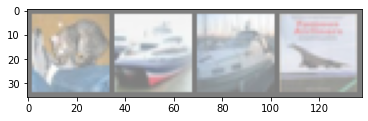

GroundTruth:    cat  ship  ship plane
time: 134 ms (started: 2021-03-20 22:16:34 +01:00)


In [29]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [31]:
outputs = vgg_11(images)

time: 35.1 ms (started: 2021-03-20 22:16:41 +01:00)


In [32]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  plane plane plane plane
time: 1.58 ms (started: 2021-03-20 22:16:44 +01:00)


### Accuracy on whole test-dataset

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = vgg_11(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %
time: 41.3 s (started: 2021-03-20 22:17:04 +01:00)


### Which classes perform well and which classes did not?

In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = vgg_11(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 98 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  1 %
time: 40.3 s (started: 2021-03-20 22:19:34 +01:00)
